In [26]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from bibmon import sklearnRegressor, ESN
import bibmon
import pandas as pd
modelos = [sklearnRegressor(RandomForestRegressor()), ESN()]

In [27]:
df_raw = bibmon.load_real_data()

In [28]:
df_num = df_raw.apply(pd.to_numeric, errors='coerce')

In [29]:
(X_treino, X_validacao, 
 X_teste, Y_treino, 
 Y_validacao, Y_teste) = bibmon.train_val_test_split(df_num, 
                                                     start_train= '2017-12-24T12:00', 
                                                     end_train= '2018-01-01T00:00', 
                                                     end_validation= '2018-01-02T00:00', 
                                                     end_test='2018-01-04T00:00',
                                                     tags_Y = 'tag100')

In [30]:
preproc_tr = ['remove_empty_variables',
              'ffill_nan',
              #'cortar_observacoes_com_nan',
              'remove_frozen_variables',
              #'add_media_movel',
              #'aplicar_lag'
              #'filtro_media_movel',
              'normalize'
             ]
preproc_ts = ['replace_nan_with_values',
              #'ffill_nan', 
              #'cortar_observacoes_com_nan'
              #'add_media_movel',
              #'aplicar_lag',
              #'filtro_media_movel',
              'normalize'
             ]
args_preproc_ts = {'replace_nan_with_values__val': X_treino.median()}

In [31]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

mtr = [r2_score, mean_absolute_error]

CPU times: total: 10.6 s
Wall time: 10.6 s


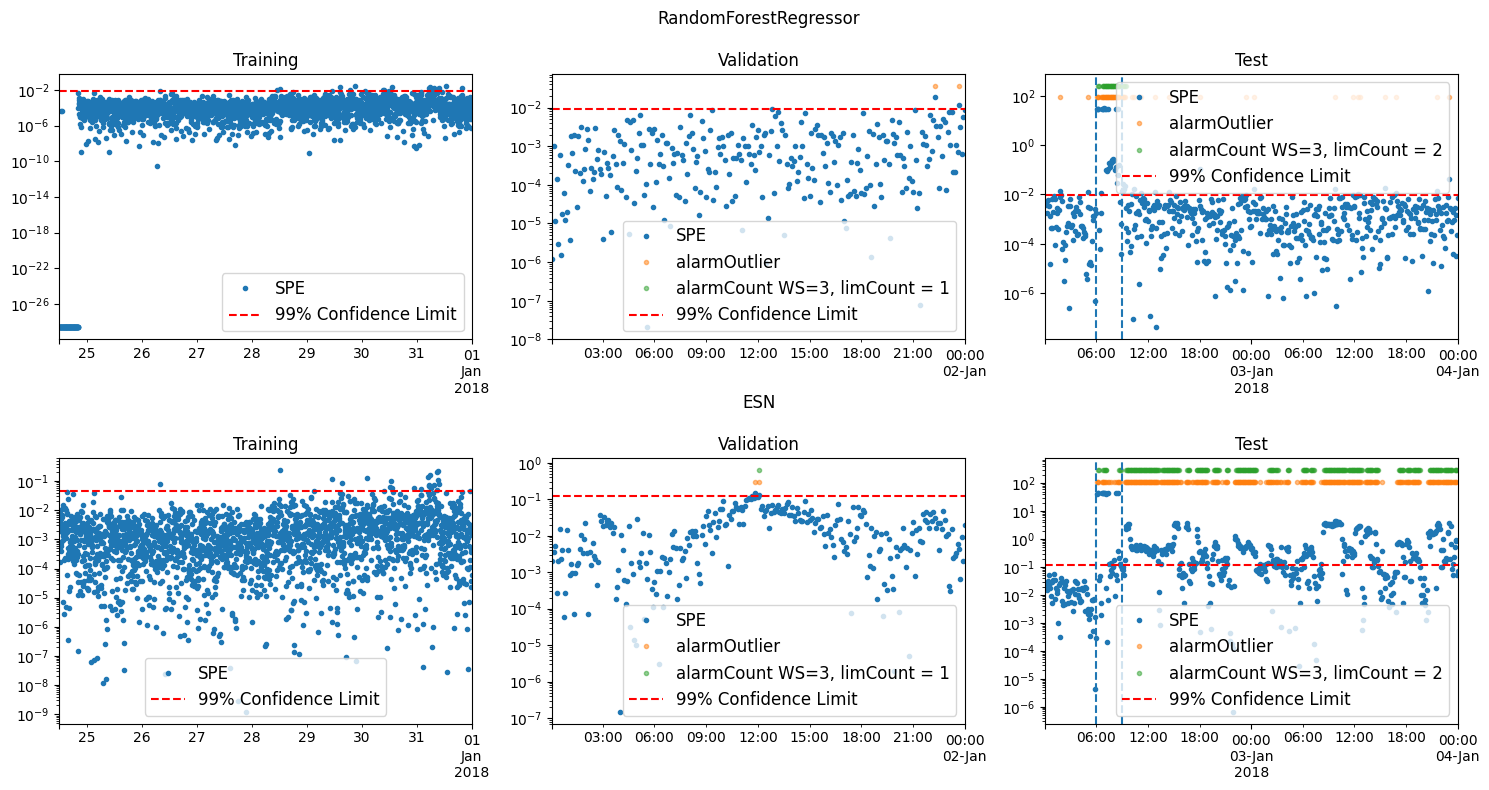

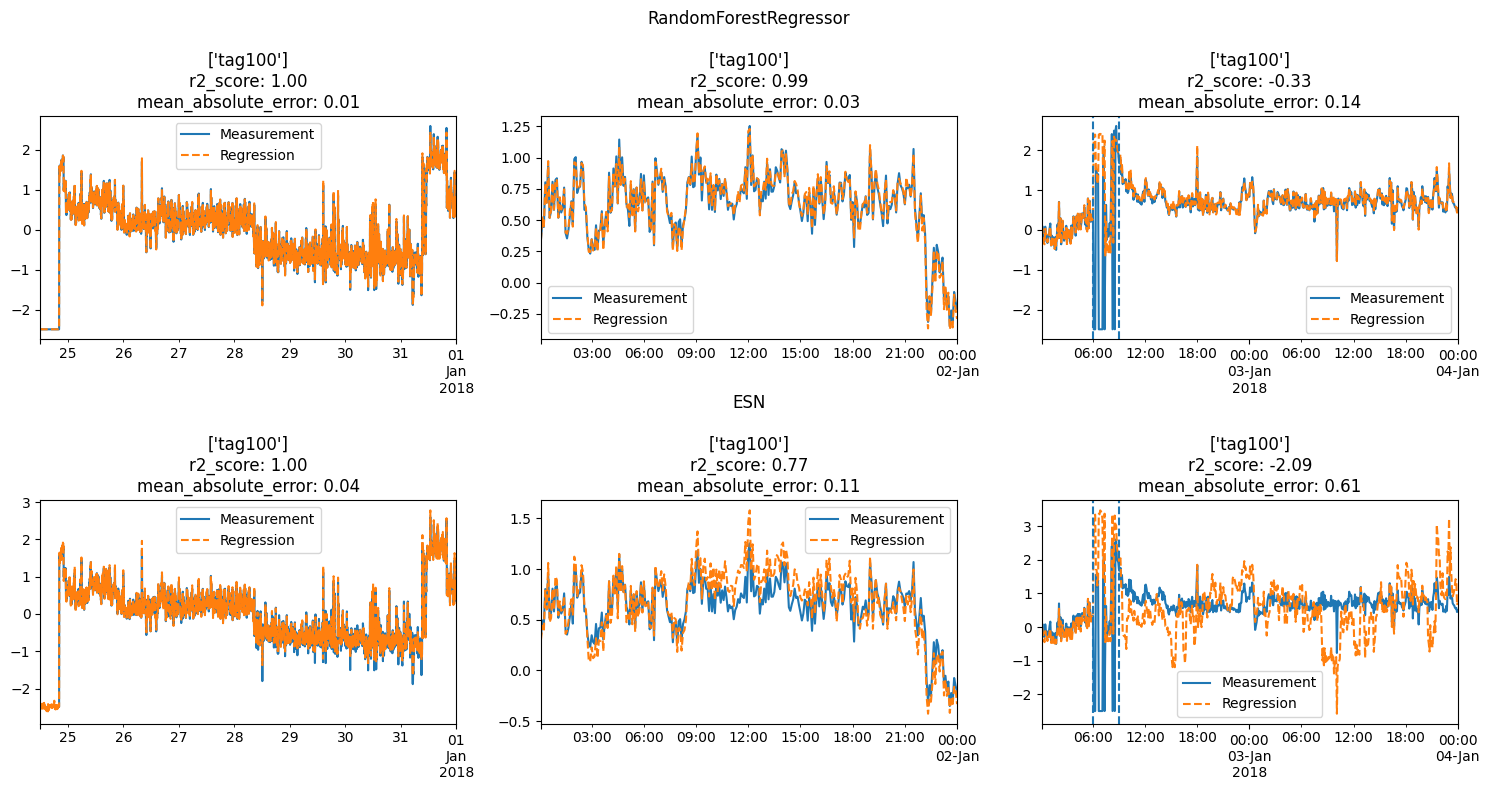

In [32]:
%%time
tab_pred, tab_detec, tab_times = bibmon.comparative_table(modelos, X_treino, X_validacao, X_teste, 
                                                           Y_treino, Y_validacao, Y_teste,
                                                           f_pp_train = preproc_tr,
                                                           f_pp_test = preproc_ts,
                                                           #a_pp_treino = args_preproc_tr,
                                                           a_pp_test = args_preproc_ts,                        
                                                           metrics = mtr, count_window_size = 3, count_limit = 2,
                                                           fault_start = '2018-01-02 06:00:00',
                                                           fault_end = '2018-01-02 09:00:00')     

In [33]:
tab_pred

Train  Validation      Test
Metrics             Models                                               
mean_absolute_error ESN                    0.039286    0.105684  0.609470
                    RandomForestRegressor  0.011847    0.025590  0.143519
r2_score            ESN                    0.996009    0.774719 -2.090361
                    RandomForestRegressor  0.999558    0.985752 -0.327915

In [34]:
tab_detec

FDR       FAR
Alarms                        Models                                   
alarmCount WS=3, limCount = 2 ESN                    0.277778  0.512963
                              RandomForestRegressor  0.750000  0.007407
alarmOutlier                  ESN                    0.500000  0.566667
                              RandomForestRegressor  0.805556  0.042593

In [35]:
tab_times

,Train,Test
RandomForestRegressor,4048.193897,14.764981
ESN,172.970748,43.077187
